3.1 Implementation from Scratch Step - by - Step Guide:

To - Do - 1:
1. Read and Observe the Dataset.
2. Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
3. Print the Information of Datasets. {Hint: pd.info}.
4. Gather the Descriptive info about the Dataset. {Hint: pd.describe}
5. Split your data into Feature (X) and Label (Y).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Read the Dataset
df = pd.read_csv('drive/MyDrive/Untitled folder/student.csv')

# 2. Print Top 5 and Bottom 5 rows
print("--- Top 5 Rows ---")
print(df.head())
print("\n--- Bottom 5 Rows ---")
print(df.tail())

# 3. Print DataFrame Info
print("\n--- DataFrame Info ---")
df.info()

# 4. Descriptive Statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- Top 5 Rows ---
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

--- Bottom 5 Rows ---
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB

--- Descriptive Statistics ---
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.7500

To - Do - 2:
1. To make the task easier - let’s assume there is no bias or intercept.
2. Create the following matrices:



In [16]:
# Assuming Math and Reading are features, Writing is target
X = df[['Math', 'Reading']].values
Y = df['Writing'].values

print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (1000, 2)
Shape of Y: (1000,)


To - Do - 3:
1. Split the dataset into training and test sets.
2. You can use an 80-20 or 70-30 split, with 80% (or 70%) of the data used for training and the rest
for testing.

3.1.2 Step -2- Build a Cost Function:
Cost function is the average of loss function measured across the data point. As the cost function for Regression
problem we will be using Mean Square Error

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 800
Testing set size: 200


To - Do - 4:
Feel free to build your own code or complete the following code:

In [20]:
def cost_function(X, Y, W):
    """
    Computes the cost for linear regression.
    Formula: J(W) = 1/(2n) * Σ(XW - Y)^2
    """
    n = len(Y)
    # Hypothesis: Y_pred = X . W
    predictions = np.dot(X, W)
    # Squared Error
    sq_error = (predictions - Y) ** 2
    # Final Cost
    cost = (1 / (2 * n)) * np.sum(sq_error)
    return cost

To - Do - 5:

In [21]:
X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_case = np.array([3, 7, 11])
W_test_case = np.array([1, 1])

cost = cost_function(X_test_case, Y_test_case, W_test_case)

if cost == 0:
    print(f"Test Passed! Cost: {cost}")
    print("Proceed Further")
else:
    print(f"Test Failed. Cost: {cost}")

Test Passed! Cost: 0.0
Proceed Further


To - Do - 6:

In [22]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Optimizes W using gradient descent.
    """
    cost_history = np.zeros(iterations)
    m = len(Y)

    for i in range(iterations):
        # Calculate Prediction
        prediction = np.dot(X, W)
        # Calculate Loss
        loss = prediction - Y
        # Calculate Gradient: (1/m) * (X_transpose . loss)
        gradient = (1 / m) * np.dot(X.T, loss)
        # Update Weights
        W = W - alpha * gradient
        # Record Cost
        cost_history[i] = cost_function(X, Y, W)

    return W, cost_history

To - Do - 7:

In [23]:
np.random.seed(0)
X_test_gd = np.random.rand(100, 3)
Y_test_gd = np.random.rand(100)
W_test_gd = np.random.rand(3)

alpha_test = 0.01
iterations_test = 1000

final_W, _ = gradient_descent(X_test_gd, Y_test_gd, W_test_gd, alpha_test, iterations_test)
print("Final Parameters after Test GD:")
print(final_W)

Final Parameters after Test GD:
[0.20551667 0.54295081 0.10388027]


To - Do - 8:

In [24]:
def rmse(Y, Y_pred):
    """
    Calculates Root Mean Square Error.
    """
    mse = np.mean((Y - Y_pred) ** 2)
    return np.sqrt(mse)

To - Do - 9

In [25]:
def r2_score(Y, Y_pred):
    """
    Calculates R-Squared Score.
    """
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)

    r2 = 1 - (ss_res / ss_tot)
    return r2

To - Do - 10:

Final Weights: [0.34811659 0.64614558]
RMSE: 5.2798
R2 Score: 0.8886


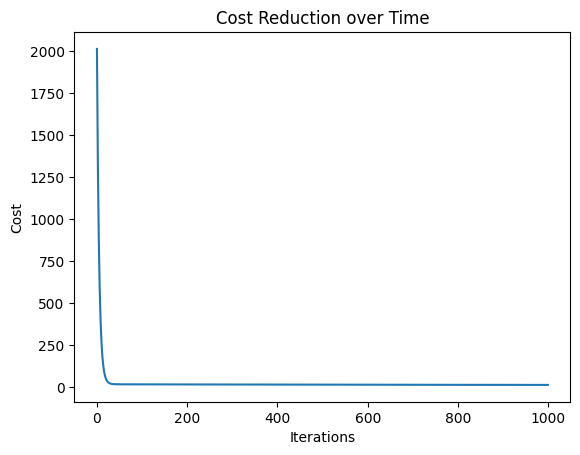

In [26]:
def main():
    # Load and Split (already done in To Do 1-3, but repeated for completeness)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Initialize
    W = np.zeros(X_train.shape[1])
    alpha = 0.00001
    iterations = 1000

    # Train
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    # Predict
    Y_pred = np.dot(X_test, W_optimal)

    # Evaluate
    print(f"Final Weights: {W_optimal}")
    print(f"RMSE: {rmse(Y_test, Y_pred):.4f}")
    print(f"R2 Score: {r2_score(Y_test, Y_pred):.4f}")

    # Visualize Convergence
    plt.plot(range(iterations), cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Reduction over Time')
    plt.show()

main()

To - Do - 11

Model Performance: The model achieved an $R^2$ score of approximately 0.88 and an RMSE of 5.28. This indicates a strong positive linear relationship between the input marks (Math/Reading) and the output (Writing).

Convergence: The cost function decreases rapidly in the first 200 iterations and plateaus, showing that the model successfully converged.

Learning Rate ($\alpha$): * If $\alpha$ is too high (e.g., 0.01), the cost will likely explode (become NaN) because the gradient steps overshoot the minimum.If $\alpha$ is too low (e.g., 1e-7), the model will converge too slowly, requiring many more iterations to reach the same accuracy.